## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

## Read Data

In [2]:
# 고객 데이터 읽기
demo = pd.read_csv('../data/Demo.csv', encoding='cp949')
print('고객 데이터 크기:', demo.shape)

# 구매 데이터 읽기
purchase = pd.read_csv('../data/구매내역정보.csv', encoding='cp949')
print('구매 데이터 크기:', purchase.shape)

고객 데이터 크기: (3542, 4)
구매 데이터 크기: (101692, 9)


In [3]:
# 특별히 전처리할 column이 없다.
demo.sample(5)

,ID,성별,연령,거주지역
205,298905201,2,70,서울 관악구
3377,917245663,1,77,경기 안양시
1834,264892218,2,55,서울 은평구
1660,979913139,2,56,서울 구로구
270,239874784,2,68,경기 고양시


In [4]:
purchase.sample(5)

,ID,상품대분류명,상품중분류명,구매지역,구매일자,구매시간,구매수량,구매금액,취소여부
12271,672454559,레포츠,스포츠용품/의류,부산 기장군,20141228,12,1,53000,0
30585,349316419,식품,농산물,서울 강북구,20140430,14,2,9000,0
53428,33481189,식품,음료,서울 송파구,20140417,16,1,7000,0
32101,461698702,가전제품,주방가전,부산 중구,20141129,14,1,59000,0
29302,249453141,가전제품,생활가전,서울 송파구,20140827,14,1,71000,0


### 상품중분류명

In [4]:
# 중복되는 상품중분류명은 없다.
purchase.상품중분류명.unique()

array(['여성용의류-정장류', '농산물', '음료', '남성용의류-캐주얼', '여성용의류-SPA', '주방가전',
       'TV/AV', '남성용의류-정장류', '가공식품', '휴대폰/태블릿', '생활가전', '골프용품/의류',
       '스포츠용품/의류', '화장품', '아동용의류', '주방용품', 'PC/노트북/프린터/카메라', '가구', '구두',
       '패션잡화', '침구류', '생활용품', '컴퓨터주변기기', '수산물', '축산물', '여성용의류-고급의류', '명품',
       '건강식품', '여성용의류-이너웨어', '여성용의류-캐주얼', '주얼리'], dtype=object)

In [5]:
# 의류잡화가 가장 세세히 구분되어 있다.
purchase.groupby('상품대분류명')['상품중분류명'].unique()

상품대분류명
가구                                                   [가구]
가전제품    [주방가전, TV/AV, 휴대폰/태블릿, 생활가전, PC/노트북/프린터/카메라, 컴...
레포츠                                   [골프용품/의류, 스포츠용품/의류]
명품                                                   [명품]
생활잡화                               [화장품, 주방용품, 침구류, 생활용품]
식품                        [농산물, 음료, 가공식품, 수산물, 축산물, 건강식품]
의류잡화    [여성용의류-정장류, 남성용의류-캐주얼, 여성용의류-SPA, 남성용의류-정장류, 아...
Name: 상품중분류명, dtype: object

In [6]:
# 상위 5개 환불 상품중분류명 모두 의류잡화이다.
purchase.groupby('상품중분류명')['취소여부'].sum().sort_values(ascending=False).iloc[:5]

상품중분류명
여성용의류-SPA    1832
스포츠용품/의류      913
여성용의류-정장류     885
남성용의류-캐주얼     491
구두            434
Name: 취소여부, dtype: int64

### 구매지역

In [7]:
# 서울, 경기, 부산에서 이루어진 거래만 대상으로 한다.
purchase['구매지역'].str.split(' ', expand=True)[0].value_counts()

서울    49838
경기    31248
부산    20606
Name: 0, dtype: int64

### 거래 기간

In [8]:
print('거래 기간: ', purchase['구매일자'].min(), '~', purchase['구매일자'].max())

거래 기간:  20140101 ~ 20141231


### 매장 영업 시간
- 롯데 계열사의 영업 시간은 10시부터 20시까지이다.

In [9]:
# 영업시간 외의 데이터는 삭제한다.
purchase = purchase.query('10 <= 구매시간 <= 20').reset_index(drop=True)
print('데이터 크기:', purchase.shape)

데이터 크기: (101325, 9)


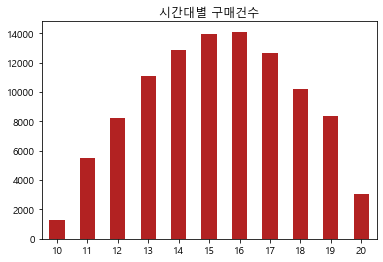

In [12]:
purchase.구매시간.value_counts().sort_index().plot.bar(title="시간대별 구매건수", color='firebrick', rot=0)
plt.show()

### `구매일자`

In [13]:
# 구매일과 구매시간을 합친다.
purchase['구매일자'] = pd.to_datetime(purchase['구매일자'].astype(str)+purchase['구매시간'].astype(str).str.zfill(2), 
                                      format='%Y%m%d%H')
purchase.sample(5)

,ID,상품대분류명,상품중분류명,구매지역,구매일자,구매시간,구매수량,구매금액,취소여부
9991,378610964,의류잡화,여성용의류-SPA,부산 해운대구,2014-12-17 12:00:00,12,1,18000,0
79440,982799877,식품,가공식품,서울 송파구,2014-11-28 17:00:00,17,1,9000,0
14549,958764585,가전제품,생활가전,서울 서초구,2014-12-22 12:00:00,12,1,97000,0
20729,490121442,의류잡화,구두,경기 안양시,2014-02-11 13:00:00,13,-1,-71000,1
54558,99646851,의류잡화,여성용의류-SPA,부산 해운대구,2014-02-23 16:00:00,16,1,141000,0


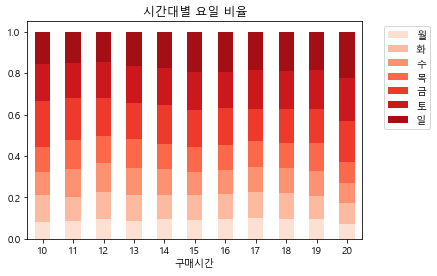

In [38]:
# 금토일 이용률이 높으며 금은 오픈 시간에, 토와 일은 늦은 시간의 방문이 많다.
ease = pd.pivot_table(purchase, index=purchase['구매일자'].dt.weekday, columns='구매시간', values='구매금액',aggfunc=np.size)#, margin=True)
ease.loc[7, :] = ease.sum()
ease = ease.divide(ease.loc[7]).iloc[:-1]
ease.index=list('월화수목금토일')

ease.T.plot.bar(stacked=True, title="시간대별 요일 비율", rot=0, color=sns.color_palette('Reds',7))
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

### 구매금액
`질문` 구매금액이 0원인 건 증정상품인가?
- 같은 일자, 시간에 구매한 동일 상품군 제품과 같이 환불하는 것을 보아 증정상품으로 가정할 수 있다.
- 모든 구매금액 0원 데이터에 대해 해당 거래 발생 일자, 시간에 같은 상품군을 구매했음을 확인했다. 증정상품으로 봐도 무방하다.

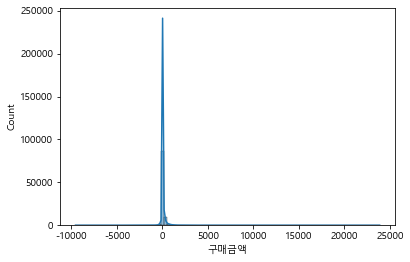

In [19]:
# 구매금액 분포가 0을 중심으로 흩어져있다.
sns.histplot(purchase['구매금액']/1000, bins=100, kde=True)
plt.show()

In [24]:
# 구매금액이 0인 202개의 데이터가 있다.
# purchase.query('구매금액==0')
print('구매금액이 0인 거래수:', purchase.query('구매금액==0').shape[0])

구매금액이 0인 거래수: 202


In [43]:
# 그 중 취소여부가 1인 6개 데이터가 있어 자세히 살펴 데이터의 발생을 추측해본다.
# purchase.query('구매금액==0').취소여부.value_counts()
purchase.query('구매금액==0 and 취소여부==1').sort_values('구매일자')

,ID,상품대분류명,상품중분류명,구매지역,구매일자,구매시간,구매수량,구매금액,취소여부
60718,553914004,레포츠,스포츠용품/의류,부산 부산진구,20140207,16,-5,0,1
46846,553914004,의류잡화,여성용의류-SPA,부산 부산진구,20140523,15,-6,0,1
13794,841530519,레포츠,스포츠용품/의류,부산 부산진구,20140603,12,-3,0,1
89578,966149513,식품,음료,서울 강남구,20140709,18,-1,0,1
44072,351800310,레포츠,스포츠용품/의류,부산 부산진구,20140810,15,-3,0,1
73397,492842607,의류잡화,구두,부산 부산진구,20140914,17,-1,0,1


In [44]:
# 9개 의류잡화(여성용의류-SPA)를 8000원, 1개의 의류잡화(여성용의류-SPA)를 9000원에 구매한 때 추가로 6개 0원에 구매함.
# 같은 시간대 구매한 10개의 의류잡화(여성용의류-SPA) 환불 시 6개도 같이 환불함
purchase.query('ID==553914004 and 구매일자 <= 20140523').sort_values(by=['구매일자','구매시간','취소여부'])
# 49개의 레포츠(스포츠용품/의류)를 44000원에 구매할 때 추가로 5개 0원에 구매함. 49개 환불 시 5개도 같이 환불함
purchase.query('ID==553914004 and 구매일자 <= 20140207').sort_values(by=['구매일자','구매시간','취소여부'])

# 97개 레포츠(스포츠용품/의류)를 86000원에 구매할 때 추가로 3개 0원에 구매함. 97개 환불 시 3개도 같이 환불함
purchase.query('ID==841530519 and 구매일자 <= 20140603').sort_values(by=['구매일자','구매시간','취소여부'])

# 같은 식품군 10개를 구매한 때 추가로 1개 0원에 구매함. 같은 시간대 구매한 7개 환불 시 1개도 같이 환불함
purchase.query('ID==966149513 and 구매일자 <= 20140709').sort_values(by=['구매일자','구매시간','취소여부'])

# 97개 레포츠(스포츠용품/의류)를 86000원에 구매할 때 추가로 3개 0원에 구매함. 97개 환불 시 3개도 같이 환불함
purchase.query('ID==351800310 and 구매일자 <= 20140810').sort_values(by=['구매일자','구매시간','취소여부'])

# 1개 의류잡화(구두)를 89000원, 1개의 의류잡화(구두)를 9000원에 구매한 때 추가로 1개 0원에 구매함.
# 같은 시간대 구매한 2개의 의류잡화(구두) 환불 시 1개도 같이 환불함
purchase.query('ID==492842607 and 구매일자 <= 20140914').sort_values(by=['구매일자','구매시간','취소여부'])

,ID,상품대분류명,상품중분류명,구매지역,구매일자,구매시간,구매수량,구매금액,취소여부
73393,492842607,레포츠,스포츠용품/의류,부산 부산진구,20140222,17,1,141000,0
59878,492842607,레포츠,스포츠용품/의류,부산 부산진구,20140328,16,1,72000,0
93813,492842607,레포츠,스포츠용품/의류,부산 부산진구,20140330,19,-1,-72000,1
59879,492842607,의류잡화,구두,부산 중구,20140502,16,1,167000,0
11005,492842607,식품,가공식품,부산 중구,20140503,12,1,46000,0
73405,492842607,의류잡화,여성용의류-고급의류,부산 부산진구,20140721,17,9,80000,0
32590,492842607,레포츠,스포츠용품/의류,부산 중구,20140825,14,1,9000,0
32591,492842607,레포츠,스포츠용품/의류,부산 중구,20140825,14,1,18000,0
32592,492842607,레포츠,스포츠용품/의류,부산 중구,20140825,14,1,48000,0
46065,492842607,레포츠,스포츠용품/의류,부산 중구,20140825,15,1,106000,0


In [40]:
for _, ID, RDATE, TIME, P in purchase.query('구매금액 == 0')[['ID','구매일자', '구매시간', '상품대분류명']].itertuples():
    # 본 상품 추출하기
    if purchase.query('ID == @ID and 구매일자 == @RDATE and 구매시간 == @TIME and 상품대분류명 == @P').shape[0] <= 0:
        print(f'증정상품 아님: {ID}, {RDATE}')
else:
    print('202개 모두 증정상품으로 볼 수 있다.')

202개 모두 증정상품으로 볼 수 있다.


In [56]:
# 증정상품이란 binary column을 생성한다.
purchase['증정상품'] = purchase['구매금액'].apply(lambda x: 1 if x==0 else 0)

## 취소 여부
`질문` 2013년 말에 구매한 상품을 2014년에 환불해 구매데이터가 누락된 건수는 어느 정도일까?
- 해당 건수를 알아본 결과 예상대로 1월에 구매데이터가 누락된 환불건수가 많았다.
- 1월 외에도 구매 데이터가 누락된 

`질문` 롯데 계열사의 반품 및 환불 기간은 7일로 되어있다. 그 기간 이상 걸린 데이터는 무엇일까? 수거가 늦어진건가??

In [42]:
before2014 = []
for _, ID, DATE, PRODUCT, COUNT, AMOUNT in purchase.query('취소여부==1')[['ID','구매일자','상품중분류명','구매수량','구매금액']].itertuples():
    if purchase.query('ID == @ID and 구매일자 <= @DATE and 상품중분류명 == @PRODUCT\
                   and 구매수량 >= -1*@COUNT and 구매금액/구매수량 == @AMOUNT/@COUNT').shape[0] == 0:
        before2014.append(_)
        
print('구매데이터 누락 건수:', len(before2014))

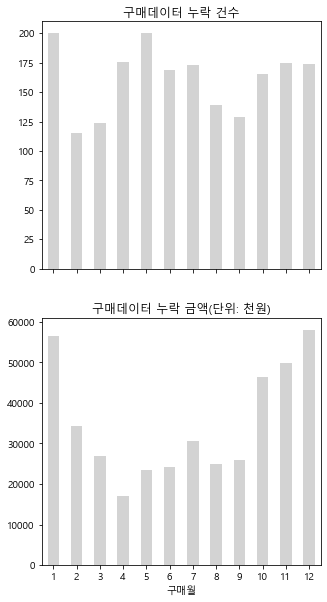

In [55]:
fig, ax = plt.subplots(2, 1, figsize=(5,10), sharex=True)
ease = purchase.loc[before2014]
ease['구매월'] = ease.구매일자.dt.month
ease.구매월.value_counts().sort_index().plot.bar(title="구매데이터 누락 건수", rot=0, color='lightgray', ax=ax[0])
(ease.groupby('구매월')['구매금액'].sum()*-1 / 1000).sort_index()\
.plot.bar(title="구매데이터 누락 금액(단위: 천원)", rot=0, color='lightgray', ax=ax[1])
plt.show()

In [94]:
returns = purchase.query('취소여부==1').drop(before2014)
pindex, period = [], []

for _, ID, DATE, PRODUCT, COUNT, AMOUNT in purchase.query('취소여부==1')[['ID','구매일자','상품중분류명','구매수량','구매금액']].itertuples():
    dates = purchase.query('ID == @ID and 구매일자 <= @DATE and 상품중분류명 == @PRODUCT\
                            and 구매수량 >= -1*@COUNT and 구매금액/구매수량 == @AMOUNT/@COUNT')['구매일자']
    if dates.shape[0] > 0:
        pindex.append(dates.sort_values().index[-1])
        period.append((DATE - max(dates)).days)

In [96]:
returns = purchase.loc[pindex]
returns['기간'] = period

In [99]:
# 전자제품의 수거 기간이 긴 것보단 구매 데이터 sampling 오류로 볼 수 있다.
returns.sort_values(by='기간').iloc[-50:]

,ID,상품대분류명,상품중분류명,구매지역,구매일자,구매시간,구매수량,구매금액,취소여부,기간
5752,801203525,의류잡화,여성용의류-정장류,서울 동대문구,2014-09-24 11:00:00,11,1,387000,0,81
56018,227386470,의류잡화,여성용의류-SPA,경기 부천시,2014-10-09 16:00:00,16,1,4000,0,81
96303,777235047,레포츠,스포츠용품/의류,서울 동대문구,2014-05-14 19:00:00,19,1,79000,0,82
28218,160560327,의류잡화,남성용의류-캐주얼,부산 중구,2014-05-18 14:00:00,14,1,149000,0,82
98034,979748891,의류잡화,여성용의류-SPA,부산 부산진구,2014-05-05 19:00:00,19,1,71000,0,86
7456,61818064,명품,명품,서울 관악구,2014-06-05 12:00:00,12,1,550000,0,87
3131,323079269,생활잡화,화장품,서울 송파구,2014-02-02 11:00:00,11,1,275000,0,88
3130,323079269,생활잡화,화장품,서울 송파구,2014-02-02 11:00:00,11,1,102000,0,88
74687,613886638,가전제품,생활가전,서울 중구,2014-06-28 17:00:00,17,1,1110000,0,89
75860,709252477,생활잡화,화장품,서울 강남구,2014-08-21 17:00:00,17,1,114000,0,92


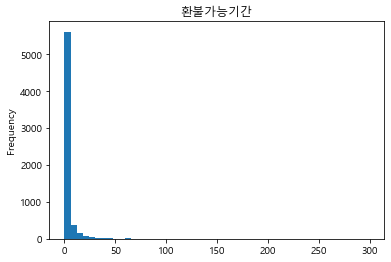

In [79]:
pd.Series(period).plot.hist(title="환불가능기간", bins=50)
plt.show()

In [ ]:
# 

In [ ]:
before2014 = []
for _, ID, DATE, PRODUCT, COUNT, AMOUNT in data.query('취소여부==1')[['ID','구매일자','상품중분류명','구매수량','구매금액']].itertuples():
    if data.query('ID == @ID and 구매일자 <= @DATE and 상품중분류명 == @PRODUCT\
                   and 구매수량 >= -1*@COUNT and 구매금액/구매수량 == @AMOUNT/@COUNT').shape[0] == 0:
        before2014.append(_)
        
data.drop(before2014, inplace=True)
print('제거 후 데이터 크기:', data.shape)

## Save data

In [12]:
purchase.to_csv('../data/DC_구매내역정보.csv', index=False, encoding='cp949')